<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2 (Saad Abbas)

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

sns.set_style('darkgrid')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

### *Answer*:
*The csv will be read in a dictionary using two steps:*
>1. *Create an empty dictionary using csv header by reading the csv as a list of lists and using the first list item values as the keys and empty dictionary for each key.*
>2. *Read the csv as a dictionary using csv.DictReader() and iterate over the output, appending each value to the corresponding key in our created doctionary.*

In [2]:
# Creating the empty dictionary using CSV header values as keys:
with open('./datasets/sat_scores.csv') as f:
    sat_dict = {x:[] for x in list(csv.reader(f))[0]}
    
# Append the corresponding values to the matching keys in dictionary    
with open('./datasets/sat_scores.csv') as f:
    for d in map(dict, csv.DictReader(f)):        
        for key, value in d.items():
            sat_dict[key].append(value)

In [3]:
# Check Outputs
sat_dict['Math'][:10]

['510', '513', '515', '505', '516', '499', '499', '506', '500', '501']

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
# Dataframe using dictionary
sat_df= pd.DataFrame(sat_dict)

In [5]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null object
Verbal    52 non-null object
Math      52 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


In [6]:
# Dataframe using Pandas
sat_df = pd.read_csv('./datasets/sat_scores.csv')

In [7]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### *Answer*:
*Using Dictionary, we have to manually check and convert all numeric values to the appropriate numeric data types.
However, Pandas automatically converts the columns to the appropriate data types when loading into the dataframe.*

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
sat_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
# Creating the Data Dictionary
sat_datadict = {
    'Size': '4 columns, 52 rows',
    'Data Description': 'This data contains the average Scholastic Assessment Test (SAT) scores for each of the 50 states in the US for each of the Math, Rate and Verbal tests.',
    'Columns': {
        'State': {
            'Description': 'This column consists of the US States',
            'Missing Values': 0,
            'Variable Type': 'String'
        },
        'Rate': {
            'Description': 'This column depicts the average score for SAT Writing score for each state',
            'Missing Values': 0,
            'Variable Type': 'Integer'
        },
        'Verbal': {
            'Description': 'This column depicts the average score for SAT Reading score for each state',
            'Missing Values': 0,
            'Variable Type': 'String'
        },
        'Math': {
            'Description': 'This column depicts the average score for SAT Math score for each state',
            'Missing Values': 0,
            'Variable Type': 'String'
        }
    }
}

In [10]:
pprint(sat_datadict)

{'Columns': {'Math': {'Description': 'This column depicts the average score '
                                     'for SAT Math score for each state',
                      'Missing Values': 0,
                      'Variable Type': 'String'},
             'Rate': {'Description': 'This column depicts the average score '
                                     'for SAT Writing score for each state',
                      'Missing Values': 0,
                      'Variable Type': 'Integer'},
             'State': {'Description': 'This column consists of the US States',
                       'Missing Values': 0,
                       'Variable Type': 'String'},
             'Verbal': {'Description': 'This column depicts the average score '
                                       'for SAT Reading score for each state',
                        'Missing Values': 0,
                        'Variable Type': 'String'}},
 'Data Description': 'This data contains the average Scholastic Assessment 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

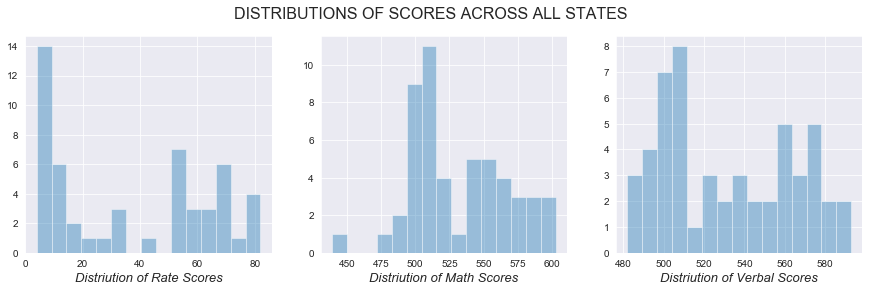

In [11]:
# Create figure and axes for the graphs
fig, axes = plt.subplots(1,3, figsize=(15,4))

# Plot the graphs on separate axes
sns.distplot(np.array(sat_df['Rate']), kde=False, ax=axes[0], bins=15);
sns.distplot(np.array(sat_df['Math']), kde=False, ax=axes[1], bins=15);
sns.distplot(np.array(sat_df['Verbal']), kde=False, ax=axes[2], bins=15);

# Create titles for overall plot and each subplot
fig.suptitle('DISTRIBUTIONS OF SCORES ACROSS ALL STATES', fontsize=16)
axes[0].set_title('Distriution of Rate Scores', y=-0.16, fontsize=13, style='italic')
axes[1].set_title('Distriution of Math Scores', y=-0.16, fontsize=13, style='italic')
axes[2].set_title('Distriution of Verbal Scores', y=-0.16, fontsize=13, style='italic');

### *Chart Analysis:*
*From the above charts, we can see that Rate, Math and Verbal have a bimodal distribution.*

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

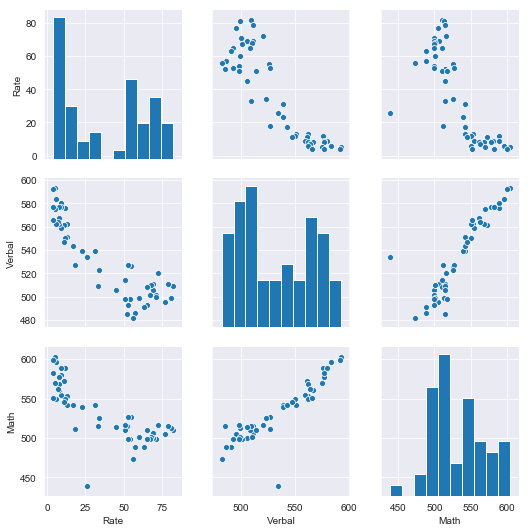

In [12]:
# Create pairplot for all columns
sns.pairplot(sat_df);

### *Chart Analysis:*
*The pair plots show the following behaviours:*
1. *Verbal and Rate seem to have a negative correlation.*
2. *Math and Rate also seem to have a negative correlation.*
3. *Math and Verbal seem have a very strong positive correlation.*

*We can investigate this further by calculating the correlations between the different columns.*

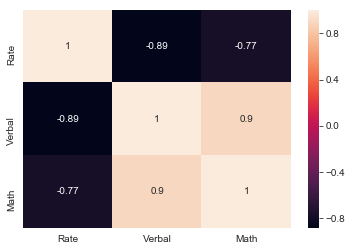

In [13]:
sns.heatmap(sat_df.corr(), annot=True);

### *Chart Analysis:*
*The above heatmap shows us that Math and Verbal have a high negative correlation with Rate, and that Verbal is very highly correlated with Math.*

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

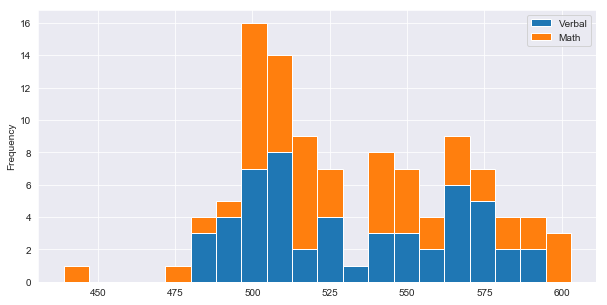

In [14]:
# Create stackked histogram for Verbal and Math scores
sat_df[['Verbal','Math']].plot.hist(bins=20, stacked=True, figsize=(10,5));

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

### *Answer:*
*A boxplot will provide us with a quick overview of the total range, the median, IQR and any outliers in the data. Even though histograms and scatterplots show the range, they do not provide us with the statistical values.*

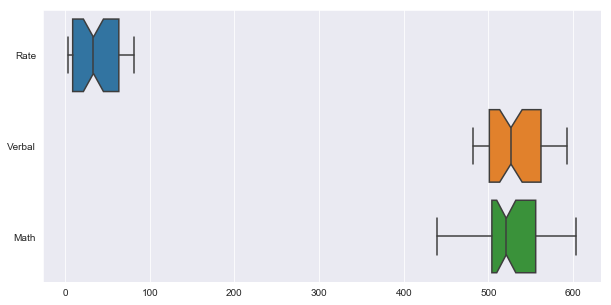

In [15]:
# Create boxplot for SAT scores
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxplot(data=sat_df, orient='h', ax=ax, notch=True);

### *Answer:*
*Since the scale of Rate is very different than those of Verbal and Math, the boxplot has squeezed the different boxes of each column to the extreme ends of the plot. This makes it difficult to judge the relative spread of each column properly as the differences in median, 25th quartile and 75th quartile are not as clear.*

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


### *Answer:*
*We can view the comparative spread of each column by normalizing the data. This will bring the mean of each column to 0, and the standard deviation to 1.*

*An additional benefit of this approach is that it allows us visualize the median of each distribution in relation to its mean.*

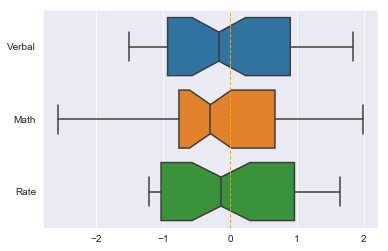

In [16]:
# Create temporary dataframe of normlized data
temp_df = sat_df[['Verbal','Math','Rate']].copy()
temp_df = (temp_df - temp_df.mean()) / temp_df.std()

# Create normalized boxplot
sns.boxplot(data=temp_df, orient='h', notch=True)
plt.axvline(x=0, color='orange', linestyle='--', linewidth=1);

### *Chart Analysis*
*From the chart above, we can see that Math has a larger proportional spread than Verbal and Rate.*

*We can also see that the median vales of each column are below the means, however the difference is significantly less than 1 standard deviation.*

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
# Calculate count of states above the average SAT score
states_above_verbal_mean = sat_df.loc[sat_df['Verbal']>sat_df['Verbal'].mean()]['State'].count()
print('There are {} states which have a Verbal score above the average Verbal score'.format(states_above_verbal_mean))

There are 24 states which have a Verbal score above the average Verbal score


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [18]:
# Calculate count of states above the median SAT score
states_above_verbal_mean = sat_df.loc[sat_df['Verbal']>sat_df['Verbal'].median()]['State'].count()
print('There are {} states which have a Verbal score above the median Verbal score'.format(states_above_verbal_mean))

There are 26 states which have a Verbal score above the median Verbal score



### *Answer:*
*There are more states above median than there are above the mean which shows that the median for the Verbal is lower than the mean. There is a higher frequency of a lower than average score for the verbal test.*

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [19]:
sat_df['Verbal - Math'] = sat_df['Verbal'] - sat_df['Math']
sat_df.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [20]:
# Top ten states having higher Verbal than Math scores
verbal_greater_than_math = sat_df.sort_values('Verbal - Math', ascending=False).head(10)

# Top ten states having higher Math than Verbal scores
verbal_less_than_math = sat_df.sort_values('Verbal - Math', ascending=True).head(10)

In [21]:
verbal_greater_than_math.head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


*OH, MS and WV have the highest difference in Verbal to Math scores.*

In [22]:
verbal_less_than_math.head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


*HI, CA and NJ have the highest difference in Math to Verbal scores.*

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [23]:
sat_df.corr()

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


### *Answer:*
*The correlation matrix show the following behaviours:*
1. *Verbal and Rate have a strong negative correlation.*
2. *Math and Rate also have a negative correlation.*
3. *Math and Verbal have a strong positive correlation.*
4. *The Math/Verbal difference is not correlated to any of the other scores*

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [24]:
sat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rate,52.0,37.153846,27.301788,4.0,9.0,33.5,63.50,82.0
Verbal,52.0,532.019231,33.236225,482.0,501.0,526.5,562.00,593.0
Math,52.0,531.500000,36.014975,439.0,504.0,521.0,555.75,603.0
Verbal - Math,52.0,0.519231,15.729939,-30.0,-6.0,0.0,4.25,95.0


### *Answer:*
>1. *count: Gives the count of values in each column*
>2. *mean: Gives the average of each column*
>3. *std: Gives the standard deviation of each column*
>4. *min: Gives the minimum value in each column*
>5. *25%: Gives the value of the 25th percentile (first quartile) of that column*
>6. *50%: Gives the median of the column*
>7. *75%: Gives the value of the 75th percentile (third quartile) of that column*

*For each column we can see the min-max range of the data, the average, and also compare the median to the average value.*

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [25]:
sat_cov = sat_df.cov()
sat_cov

,Rate,Verbal,Math,Verbal - Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995


### *Answer:*
>1. *Covariance is the magnitude and direction of the relationship between two variables. Correlation also depicts the same relationship, however it is standardized by dividing it by the Standard Deviations of both samples.*
>
>2. *The correlation is preferred to the covariance because it has a normalized scale. This means that all relationships are measured between -1 and 1. This way we can compare the relative correlations to judge which features are more highly related than others. This is not possible to do with covariance, since covariance of each set of features has a different scale and cannot be compared.*
>
>3. *Convariance can be converted to correlation by the below formula:*
>
$$\frac{Cov(A,B)}{StDev(A) StDev(B)}$$ 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [26]:
drug_df = pd.read_csv('./datasets/drug-use-by-age.csv')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [27]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [28]:
drug_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### *Solution Notes:*
*From the data definitions we have found on website https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age, the 'use' column is the percentage of people who used that substance in the last 12 months. Similarly, the 'frequency' column is the median number of times a single user used that substance in the past 12 months.*

*Since column 'n' is not defined in the data definition, we will assume that it is the sample size of that age group used for this dataset.*

*We will rename these columns for better clarity.*

In [29]:
old_col_names = list(drug_df.columns)

In [30]:
new_col_names = []
for colname in old_col_names:
    if colname=='age':
        new_col_names.append('sample_age')    
    elif colname=='n':
        new_col_names.append('sample_size')
    else:
        if '-use' in colname:
            new_col_names.append(colname.replace('-use', '_%users'))
        else:
            new_col_names.append(colname.replace('-frequency', '_median_use'))

In [31]:
drug_df.columns = new_col_names

In [32]:
drug_df.head()

,sample_age,sample_size,alcohol_%users,alcohol_median_use,marijuana_%users,marijuana_median_use,cocaine_%users,cocaine_median_use,crack_%users,crack_median_use,...,oxycontin_%users,oxycontin_median_use,tranquilizer_%users,tranquilizer_median_use,stimulant_%users,stimulant_median_use,meth_%users,meth_median_use,sedative_%users,sedative_median_use
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### *Solution Notes:*
*Column sample_age is an object which needs to converted to integer type. There are two reasons it is appearing as an object:*
>1. *Some values are entered as a range. For these we will take the average of that range for our dataframe.*
>2. *One value is mentioning 65+. We will remove the '+' for our dataframe.*

In [33]:
def sample_age_to_number(val):
    if '-' in val:
        new_valrange = val.split('-')
        new_val = (int(new_valrange[0]) + int(new_valrange[1])) / 2
    elif '+' in val:
        new_val = val.replace('+', '')
    else:
        new_val = val
    return int(new_val)

In [34]:
drug_df['sample_age'] = drug_df['sample_age'].copy().map(sample_age_to_number)

### *Solution Notes:*
*Some columns should be float type, however they are appearing as objects due to unwanted characters which represent missing values. We will replace all missing value occurences with **np.nan** and convert all columns to numeric to be able to run statistic tests.*

*However, since each row represents a particular age group, we will not drop any rows or columns from the dataset.*

In [35]:
# Convert all columns to float replacing '-' to np.Nan
drug_df_num = drug_df.applymap(lambda x: 0 if x=='-' else float(x))

In [36]:
# Convert 'sample_age back to integer type'
drug_df_num['sample_age'] = drug_df_num['sample_age'].astype('int')

In [37]:
drug_df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
sample_age,17.0,25.529412,15.362770,12.0,16.0,20.0,27.0,65.0
sample_size,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol_%users,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol_median_use,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana_%users,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana_median_use,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine_%users,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
cocaine_median_use,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack_%users,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
crack_median_use,17.0,12.382353,17.361532,0.0,2.0,6.0,15.0,62.0


### *Solution Notes:*
*In order to make logical sense of the data, we will split the dataset into two parts:*
>1. *Data of % use of a substance by age*
>2. *Data of median use of a substance by an individual by age*

In [38]:
# Create list of column name to separate the dataframes
percent_use_cols = ['sample_age','sample_size']
median_use_cols = ['sample_age','sample_size']
for colname in drug_df_num.columns:
    if '_%users' in colname:
        percent_use_cols.append(colname)
    if '_median_use' in colname:
        median_use_cols.append(colname)

In [39]:
# Create the separate %use and median_use dataframes
drug_percent_use = drug_df_num[percent_use_cols].copy()
drug_median_use = drug_df_num[median_use_cols].copy()

In [40]:
drug_percent_use.head(3)

,sample_age,sample_size,alcohol_%users,marijuana_%users,cocaine_%users,crack_%users,heroin_%users,hallucinogen_%users,inhalant_%users,pain-releiver_%users,oxycontin_%users,tranquilizer_%users,stimulant_%users,meth_%users,sedative_%users
0,12,2798.0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757.0,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792.0,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2


In [41]:
drug_median_use.head(3)

,sample_age,sample_size,alcohol_median_use,marijuana_median_use,cocaine_median_use,crack_median_use,heroin_median_use,hallucinogen_median_use,inhalant_median_use,pain-releiver_median_use,oxycontin_median_use,tranquilizer_median_use,stimulant_median_use,meth_median_use,sedative_median_use
0,12,2798.0,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13,2757.0,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,2792.0,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5


### *Solution Notes:*
*We will try to understand the data by making bar plots of substance use by age separately for each dataframe.*

#### _Visualization 1: Percent of use by population:_

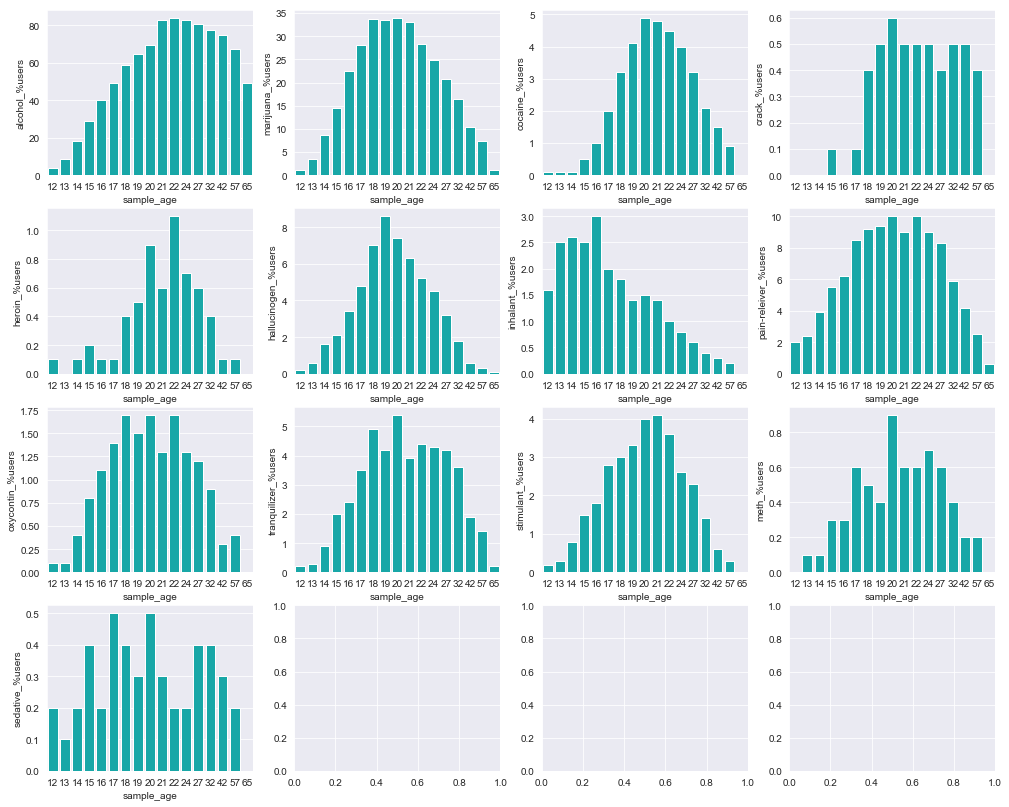

In [44]:
# Create subplots
fix, ax = plt.subplots(4,4, figsize=(17,14))
plt.subplots_adjust(hspace=0.2)

# Create a list of drugs to iterate over the subplots
drug_name = list(drug_percent_use.columns)[2:]

# Loop for creating subplots for each drug
plot_count = 0
for i in range(4):
    for j in range(4):
        if plot_count < 13:
            sns.barplot(x=drug_percent_use['sample_age'], y=drug_percent_use[drug_name[plot_count]],
                        orient='v', ax=ax[i][j], color='c')
        plot_count += 1        

### *Chart Analysis:*
*We can see the following observations:*
>1. *Inhalant users decrease in the population with increasing age.*
>2. *Percentage of sedative users in the population peaks during teenage years and then again around the age of 30.*
>3. *All other substance uses have a normal distribution, however the age group where it has maximum use by percentage of population varies slightly for each substance.*

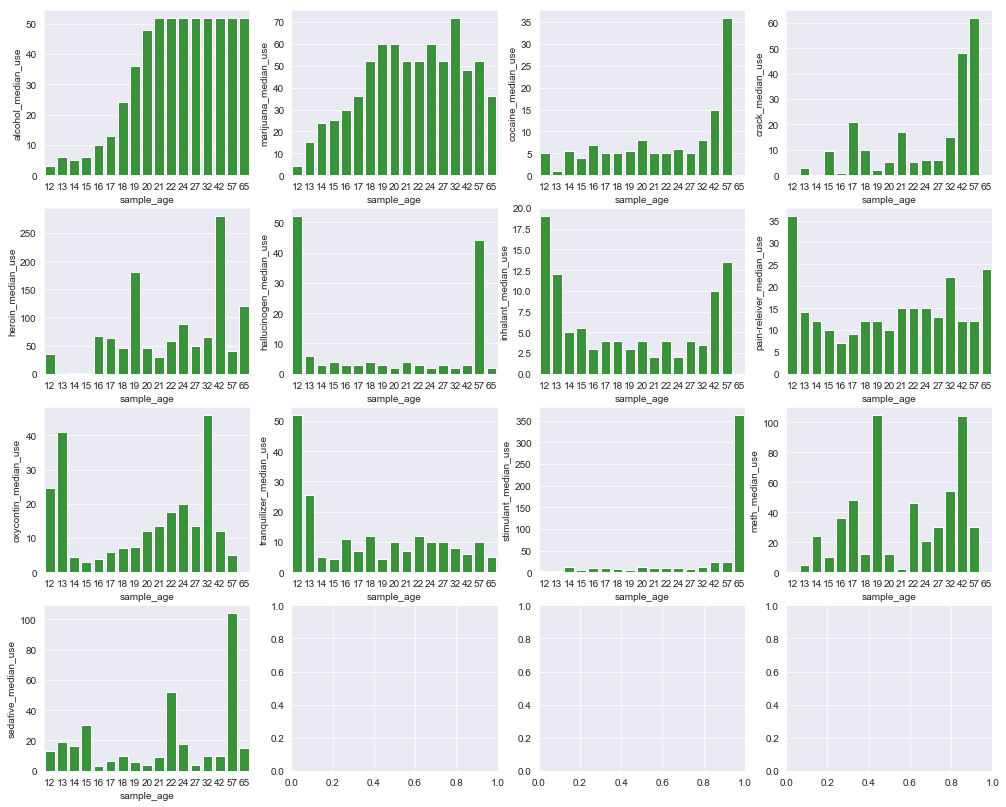

In [45]:
# Create subplots
fix, ax = plt.subplots(4,4, figsize=(17,14))
plt.subplots_adjust(hspace=0.2)

# Create a list of drugs to iterate over the subplots
drug_name = list(drug_median_use.columns)[2:]

# Loop for creating subplots for each drug
plot_count = 0
for i in range(4):
    for j in range(4):
        if plot_count < 13:
            sns.barplot(x=drug_median_use['sample_age'], y=drug_median_use[drug_name[plot_count]],
                        orient='v', ax=ax[i][j], color='C2')
        plot_count += 1

### *Chart Analysis:*
*We can see the following observations:*
>1. *Frequency of alcohol and marijuana consumption rises sharply around the teenage years, then maintains a steady high value with increasing age.*
>2. *Cocaine, crack, sedative, inhalant and stimulant stays lows throughout increases age and sharply increases at a high age.*
>3. *Meth and herion use increases sharply around 19-20 and 40-50 years of age.*

### *Correlation Check*
*For correlation, we will only check if any drug use or drug intake median is correlated by age group. This is because correlating one drug use by another does not give any meaningful insights, since they are all related to different age groups.*

In [46]:
percent_corr = drug_percent_use.corr()['sample_age'].sort_values()
median_corr = drug_median_use.corr()['sample_age'].sort_values()

In [47]:
percent_corr.head()

inhalant_%users        -0.799781
pain-releiver_%users   -0.443828
hallucinogen_%users    -0.419643
stimulant_%users       -0.411138
oxycontin_%users       -0.393424
Name: sample_age, dtype: float64

In [48]:
percent_corr.tail()

cocaine_%users   -0.192552
crack_%users      0.144131
sample_size       0.293039
alcohol_%users    0.361413
sample_age        1.000000
Name: sample_age, dtype: float64

In [49]:
median_corr.head()

tranquilizer_median_use   -0.311577
oxycontin_median_use      -0.210308
inhalant_median_use       -0.054093
meth_median_use            0.101356
hallucinogen_median_use    0.143281
Name: sample_age, dtype: float64

In [50]:
median_corr.tail()

cocaine_median_use      0.495858
crack_median_use        0.539318
alcohol_median_use      0.636576
stimulant_median_use    0.704981
sample_age              1.000000
Name: sample_age, dtype: float64

### *Solution Notes:*

***Using a correlation value of 0.6 as a cutoff for significant correlation:***
1. *The percentage of population using inhalant decreases with increasing age.*
2. *The median use of alcohol and stimulant increases with increasing age for the users of those substances.*

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

### *Question:*
*The question we will try to answer is whether the average of percent users by total population are the same for crack and herion.*

*This can be written as below:*
>***H0:***:$\bar{x}_{crack} =  \bar{x}_{herion}$
>
>*(The average percent use by population of crack is the same as that for heroin.)*

>***H1:***:$\bar{x}_{crack} <>  \bar{x}_{heroin}$
>
>*(The average percent use by population of crack is different than that of heroin.)*

### *Deliverables*
*The deliverables from this question will be the following:*
>1. *The calculated t-statistic*
>2. *The calculated p-value*
>3. *Final conclusion for rejecting or failing to reject the null hypothesis*

### *Exploratory Data Analysis:*
*We will visualize the % users of crack and heroin to see how the distribution differs:*

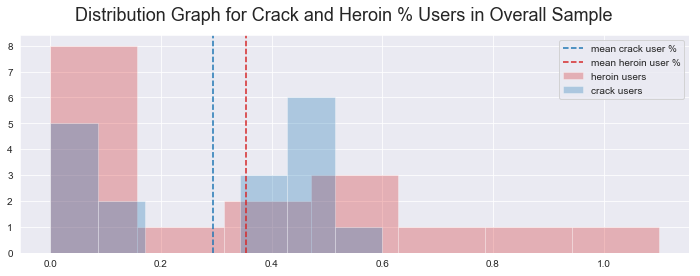

In [54]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
ax = plt.hist(drug_percent_use['heroin_%users'], color='C3', alpha=0.3, bins=7, label = 'heroin users')
ax = plt.hist(drug_percent_use['crack_%users'], color='C0', alpha=0.3, bins=7, label = 'crack users')
plt.axvline(x=drug_percent_use['crack_%users'].mean(), color='C0', linestyle='--', label='mean crack user %')
plt.axvline(x=drug_percent_use['heroin_%users'].mean(), color='C3', linestyle='--', label='mean heroin user %')
fig.suptitle('Distribution Graph for Crack and Heroin % Users in Overall Sample', fontsize=18)
plt.legend();

In [55]:
np.corrcoef(drug_percent_use['crack_%users'], drug_percent_use['heroin_%users'])[0][1]

0.7507903240416459

*Looking at the above graph we can see that higher occurences of both crack and heroin appear in similar percentage groups (0-0.2% and 0.4-0.6% respectively). Also, the means of both distributions are quite close.*

*Moreover, heroin use and crack use appear to have moderately high positive correlation.*

### *Hypothesis Testing:*

In [56]:
tstat, pval = stats.ttest_ind(drug_percent_use['crack_%users'], drug_percent_use['heroin_%users'])
print("t-statistic =", tstat)
print("p-value =", pval)

t-statistic = -0.5935214599909907
p-value = 0.5570045817367291


**Report**



...

## HYPOTHESIS TEST REPORT

### 1.0 Hypothesis To Be Tested

This report presents the results of the hyposthesis that the average of percent users by total population are the same for crack and heroin.

The mathematical notation for the null hypothesis and alternate hypothesis for this can be presented as below:
>***H0:***:$\bar{x}_{crack} =  \bar{x}_{herion}$
>
>*(The average percent use by population of crack is the same as that for heroin.)*

>***H1:***:$\bar{x}_{crack} <>  \bar{x}_{heroin}$
>
>*(The average percent use by population of crack is different than that of heroin.)*


### 2.0 Sample Details

The samples for crack and herion usage have a size of 17 observations. Each observation is a percent usage by sample population within a certain age (total 17 age groups, hence 17 observations). The average of each observation column will give us the average percentage use of each drug over all age groups.

The purpose of this test is to identify whether there is any significant difference in the overall users of crack and heroin by percent population over all age groups.

### 3.0 Methodology & Assumptions

Due to the small sample size, we will conduct a Student's T-test to indentify the statistical significance in the difference of means of the two groups. This will be considered a **two-tailed** test as the difference in the group means may be either negative or positive.

Since we do not know the population parameters for drug use of these two products, we will assume the variance of both populations to be statistically similar.

### 4.0 Calculation Results

The results calculated by the T-test are as follows:
1. T-statistic: -0.5935
2. P-value: 0.557

### 5.0 Conclusion

**Using an alpha of 0.05 (95% Confidence Interval)**, we fail to reject the null hypothesis since the p-value is greater than our selected alpha.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [57]:
sat_rate = sat_df['Rate'].copy()

In [58]:
# Calculating the upper and lower boundaries (1.5 times IQR from the 25th and 75th percentile)
sat_rate_q1 = np.percentile(sat_rate, 25)
sat_rate_q3 = np.percentile(sat_rate, 75)
sat_rate_iqr = sat_rate_q3 - sat_rate_q1
sat_rate_upper_range = sat_rate_q3+(sat_rate_iqr*1.5)
sat_rate_lower_range = sat_rate_q1-(sat_rate_iqr*1.5)

In [59]:
# Print all values outside of the upper or lower ranges
sat_rate[(sat_rate > sat_rate_upper_range) | (sat_rate < sat_rate_lower_range)]

Series([], Name: Rate, dtype: int64)

*Outliers are calculated as either above q3 + 1.5 times the IQR, or q1 - 1.5 times the IQR.*

*As per the calculations, there are no outliers in the Rate columns.*

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [60]:
stats.spearmanr(sat_df['Verbal'], sat_df['Math'])

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

### Answer:
***Pearson***

*The Pearson correlation is a measure of the magnitude and direction of the **linear** relationship between two variables. It assumes that the population is normally distributed, however it is significantly affected by outliers since it uses deviation-from-mean as a factor for computation. Pearson's can be utilized for ratio or interval data.*

***Spearman***

*The Spearman correlation is a measure of the magnitude and direction of the **monotonic** relationship between two variables (e.g. whether 'y' continually increases or continually decreases with increasing 'x', regardless of linearity). This is computed using the difference in rank of the sorted variable sets (as compared to the absolute value of observations used by Pearson). This method reduces the bias of outlier effects on the correlation calculation. In addition to ratio and interval data, Spearman's rho can also be used for ordinal data (assuming the data can be ranked), and does not require the population to be normally distributed.*

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [61]:
# Add percentile column for Rate
sat_df['RatePercentile'] = [stats.percentileofscore(sat_df['Rate'].sort_values().tolist(), x) for x in sat_df['Rate']]

In [62]:
# Check row entry for California
sat_df[sat_df['State']=='CA']

,State,Rate,Verbal,Math,Verbal - Math,RatePercentile
23,CA,51,498,517,-19,56.730769


*California has 56.730769 percentile of Rate score.*

*Spearman's correlation uses the **sorted rank** for the values the observation sets, which can also be denoted by their respective percentiles. A demonstration is as follows:*

In [63]:
# Spearman's correlation between Rate and Verbal
stats.spearmanr(sat_df['Rate'], sat_df['Verbal'])

SpearmanrResult(correlation=-0.8332941751758289, pvalue=1.8007540456756275e-14)

In [64]:
# New list of percentiles of Verbal column
verbal_percentiles = [stats.percentileofscore(sat_df['Verbal'].sort_values().tolist(), x) for x in sat_df['Verbal']]

# Pearson's correlation of Rate and Verbal percentile arrays
stats.pearsonr(sat_df['RatePercentile'], verbal_percentiles)

(-0.8332941751758289, 1.800754045675635e-14)

*From the above, we can see that the Spearman's correlation of two arrays is simply the **Pearson's Correlation of the percentiles** for those arrays.*

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

*Since outliers are situated far away from the main cluster of obsevations, they have a tendency to skew the aggregates of the sample, for example outliers may affect the mean or the Pearson's correlation since it looks for aggregation over **all available observations** in a sample distribution. In contrast, percentile scoring works on the **number of observations** below a certain amount of total observations in a sorted sample, giving a clearer picture of the distribution of the sample.*

*Below are two line plots showing the distributions of the original data of heroin use compared to their percentile values.*

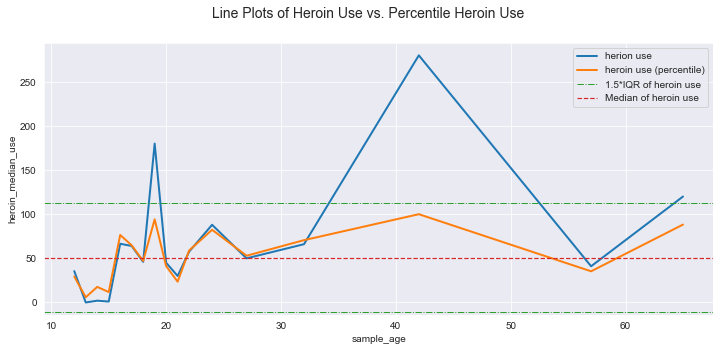

In [100]:
# Create subplot
fig, ax = plt.subplots(1,1, figsize=(12,5))

# Calculate Percentiles for the heroin median use
heroin_percentiles = [stats.percentileofscore(drug_median_use['heroin_median_use'].sort_values().tolist(), x)
                      for x in drug_median_use['heroin_median_use']]

# Calculate median and 1.5*IQR boundaries for the original data
heroin_median = drug_median_use['heroin_median_use'].median()
heroin_25 = np.percentile(drug_median_use['heroin_median_use'], 25) 
heroin_75 = np.percentile(drug_median_use['heroin_median_use'], 75) 
heroin_upper_bound = heroin_75 + 1.5*(heroin_75-heroin_25)
heroin_lower_bound = heroin_25 - 1.5*(heroin_75-heroin_25)

# Create line plots for original and percentile data
sns.lineplot(y=drug_median_use['heroin_median_use'], x=drug_median_use['sample_age'], ax=ax, lw=2, label='herion use');
sns.lineplot(y=heroin_percentiles, x=drug_median_use['sample_age'], lw=2, label='heroin use (percentile)')

# Plot median lines and 1.5*IQR boundaries for original data
plt.axhline(heroin_upper_bound, color='C2', ls='-.', lw=1, alpha=1, label='1.5*IQR of heroin use')
plt.axhline(heroin_median, color='C3', ls='--', lw=1.2, alpha=1, label='Median of heroin use')
plt.axhline(heroin_lower_bound, color='C2', ls='-.', lw=1, alpha=1)
plt.legend()

# Plot Title
plt.suptitle('Line Plots of Heroin Use vs. Percentile Heroin Use', fontsize=14);

### ***Chart Analysis***

*In the above plot, we can observe how the original data points extend beyond the 1.5xIQR range of the median value, resulting in outliers. However, the percentile values are within the 0 and 100 range, removing the outlier effects.*